<ipython-input-4-c72327ac4fc2>:18: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate(method='linear', axis=0).fillna(method='bfill').fillna(method='ffill')
<ipython-input-4-c72327ac4fc2>:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method='linear', axis=0).fillna(method='bfill').fillna(method='ffill')


Linear Regression:
MAE: 13.504368010730209
MSE: 250.00104088333376
RMSE: 15.811421216428768
R-squared: 0.9901220429357529

Decision Tree Regressor:
MAE: 10.211666666666666
MSE: 128.69386666666685
RMSE: 11.344331918040254
R-squared: 0.9949150912137261


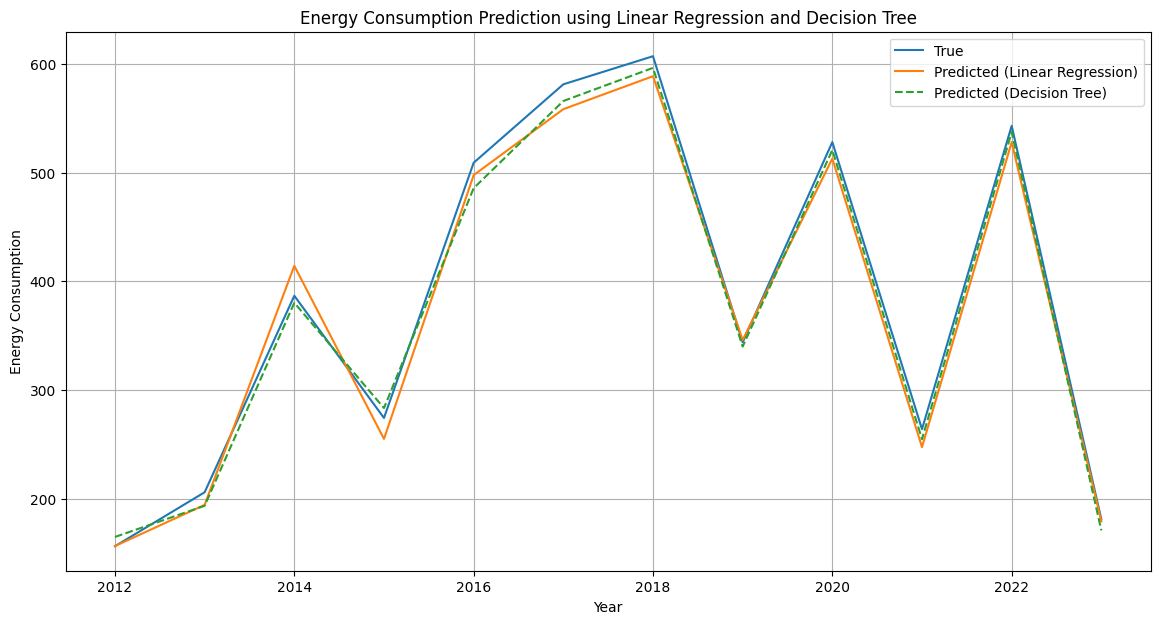

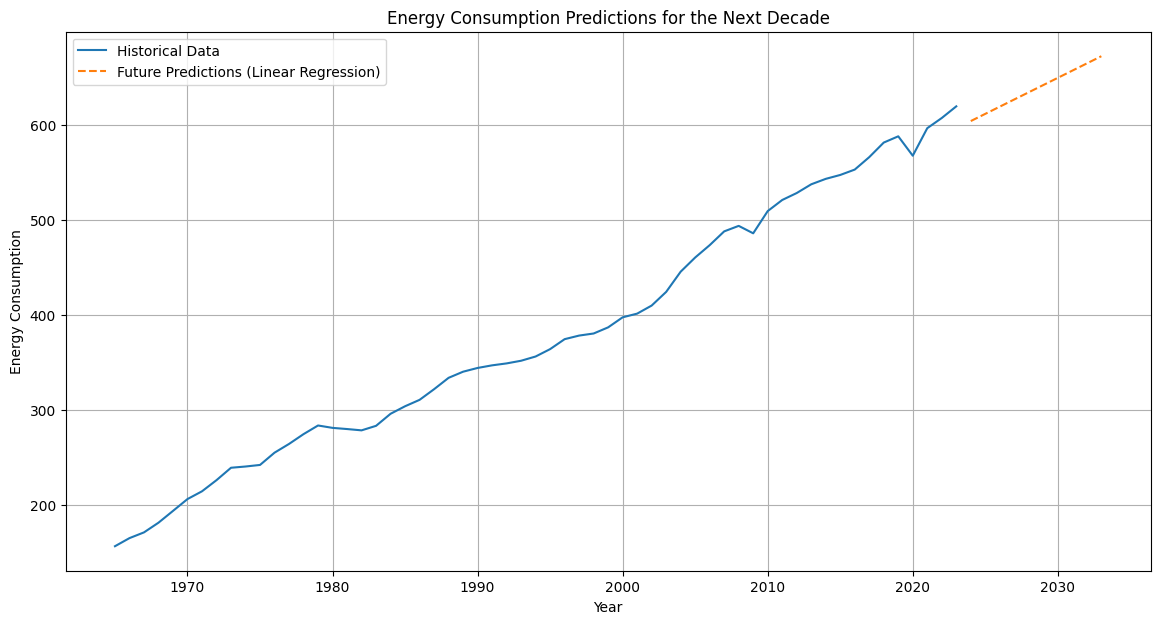

<Figure size 1400x700 with 0 Axes>

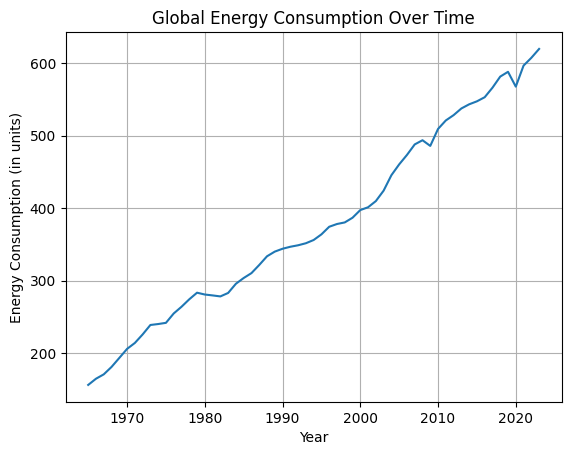

<Figure size 1400x700 with 0 Axes>

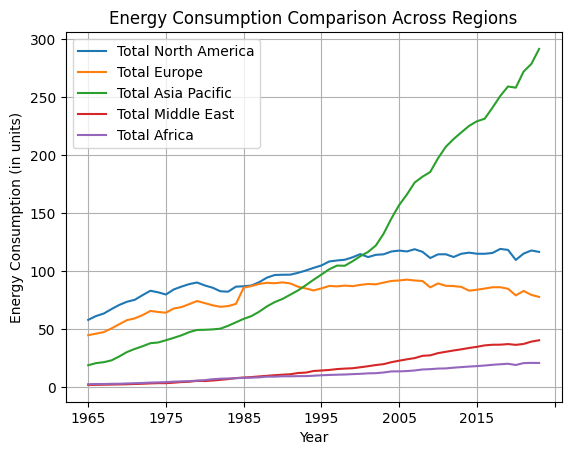

<Figure size 1400x700 with 0 Axes>

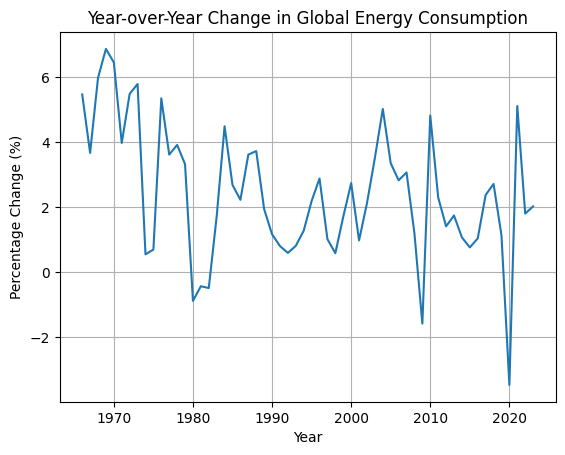

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


file_path = 'NSDC - World Energy Consumption.xlsx'
df = pd.read_excel(file_path, sheet_name='NSDC - World Energy Consumption')


df = df.dropna(how='all')
numeric_columns = df.columns[1:]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
df = df.interpolate(method='linear', axis=0).fillna(method='bfill').fillna(method='ffill')
df.set_index('Country', inplace=True)


world_data = df.loc['Total World'].T.reset_index()
world_data.columns = ['Year', 'EnergyConsumption']
world_data['Year'] = pd.to_datetime(world_data['Year'], format='%Y').dt.year


X = world_data['Year'].values.reshape(-1, 1)
y = world_data['EnergyConsumption'].values

scaler = MinMaxScaler(feature_range=(0, 1))
y_scaled = scaler.fit_transform(y.reshape(-1, 1)).flatten()


X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.2, random_state=42)

linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_pred_lr = linear_regressor.predict(X_test)


tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train, y_train)
y_pred_tree = tree_regressor.predict(X_test)


y_pred_lr_inverse = scaler.inverse_transform(y_pred_lr.reshape(-1, 1)).flatten()
y_pred_tree_inverse = scaler.inverse_transform(y_pred_tree.reshape(-1, 1)).flatten()
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()


mae_lr = mean_absolute_error(y_test_inverse, y_pred_lr_inverse)
mse_lr = mean_squared_error(y_test_inverse, y_pred_lr_inverse)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test_inverse, y_pred_lr_inverse)

print("Linear Regression:")
print(f'MAE: {mae_lr}')
print(f'MSE: {mse_lr}')
print(f'RMSE: {rmse_lr}')
print(f'R-squared: {r2_lr}')


mae_tree = mean_absolute_error(y_test_inverse, y_pred_tree_inverse)
mse_tree = mean_squared_error(y_test_inverse, y_pred_tree_inverse)
rmse_tree = np.sqrt(mse_tree)
r2_tree = r2_score(y_test_inverse, y_pred_tree_inverse)

print("\nDecision Tree Regressor:")
print(f'MAE: {mae_tree}')
print(f'MSE: {mse_tree}')
print(f'RMSE: {rmse_tree}')
print(f'R-squared: {r2_tree}')


future_years = np.arange(world_data['Year'].max() + 1, world_data['Year'].max() + 11).reshape(-1, 1)
future_predictions_lr_scaled = linear_regressor.predict(future_years)
future_predictions_lr = scaler.inverse_transform(future_predictions_lr_scaled.reshape(-1, 1)).flatten()


plt.figure(figsize=(14, 7))
plt.plot(world_data['Year'][-len(y_test):], y_test_inverse, label='True')
plt.plot(world_data['Year'][-len(y_pred_lr):], y_pred_lr_inverse, label='Predicted (Linear Regression)')
plt.plot(world_data['Year'][-len(y_pred_tree):], y_pred_tree_inverse, label='Predicted (Decision Tree)', linestyle='--')
plt.title('Energy Consumption Prediction using Linear Regression and Decision Tree')
plt.xlabel('Year')
plt.ylabel('Energy Consumption')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(14, 7))
plt.plot(world_data['Year'], y, label='Historical Data')
plt.plot(future_years.flatten(), future_predictions_lr, label='Future Predictions (Linear Regression)', linestyle='--')
plt.title('Energy Consumption Predictions for the Next Decade')
plt.xlabel('Year')
plt.ylabel('Energy Consumption')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(14, 7))
world_data.plot(x='Year', y='EnergyConsumption', legend=False)
plt.title('Global Energy Consumption Over Time')
plt.xlabel('Year')
plt.ylabel('Energy Consumption (in units)')
plt.grid(True)
plt.show()


regions = ['Total North America', 'Total Europe', 'Total Asia Pacific', 'Total Middle East', 'Total Africa']
plt.figure(figsize=(14, 7))
df.loc[regions].T.plot()
plt.title('Energy Consumption Comparison Across Regions')
plt.xlabel('Year')
plt.ylabel('Energy Consumption (in units)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


yearly_change = world_data.set_index('Year').pct_change().dropna() * 100
plt.figure(figsize=(14, 7))
yearly_change.plot(y='EnergyConsumption', legend=False)
plt.title('Year-over-Year Change in Global Energy Consumption')
plt.xlabel('Year')
plt.ylabel('Percentage Change (%)')
plt.grid(True)
plt.show()